In [1]:
from __future__ import absolute_import, division, print_function
import glob
import os
import pdb
import numpy as np
import numpy.random as npr
import tensorflow as tf
import sys
import matplotlib.pyplot as plt
import pdb
import json
import getpass
from scipy import stats
from sklearn import linear_model
from numpy import linalg as LA
import numpy.random as npr
from sklearn.decomposition import PCA
from scipy.spatial import distance
from sklearn.manifold import MDS
from scipy.spatial import distance
from sklearn.cluster import KMeans

import getpass
ui = getpass.getuser()
if ui == 'laura':
    p = '/home/laura'
elif ui == 'lauradriscoll':
    p = '/Users/lauradriscoll/Documents'

net = 'stepnet'
PATH_NET = os.path.join(p,'code/multitask-nets',net) 

sys.path.insert(0, PATH_NET)
from tools_lnd import make_h_trial_rule, get_model_params, plot_epoch_dynamics_3D
from tools_lnd import gen_trials_from_model_dir, make_FP_axs, take_names

In [2]:
def get_filename(trial, epoch,t):
    ind_stim_loc  = str(int(180*trial.y_loc[-1,t]/np.pi))
    nonzero_stim = trial.stim_locs[t,:]<100
    stim_names = '_'.join(str(int(180*x/np.pi)) for x in trial.stim_locs[t,nonzero_stim])
    filename = epoch+'_trial'+str(t)+'_x'+stim_names+'_y'+ind_stim_loc

    return filename, ind_stim_loc

def make_D_use(m,rule,epoch,ti,axs,trial_num = [0,0]):
    trial_str = '_'.join(str(t) for t in trial_num)
    trial = gen_trials_from_model_dir(m,rule,noise_on = False)
    filename,_ = get_filename(trial,epoch,ti)
    f = os.path.join(m,'tf_fixed_pts_manytrials',rule,filename+'.npz')
    D_use = make_FP_axs(f, m, rule, epoch, axs = axs, clust = 'False')
    _, ax_rule_name, _, _ = take_names(epoch,rule)
    return D_use

In [3]:
figpath = os.path.join(p,'code','overleaf','multitask-nets','v4_figs','paper_figs','fig1','fig1_two_task_fp_struct')
if not os.path.exists(figpath):
    os.makedirs(figpath)

In [15]:
##################################################################
#Find right model dir
##################################################################

rule_trains = ['fdgo','fdanti']

rule_trains_str = '_'.join(rule_trains)

rnn_type = 'LeakyRNN'
activation = 'softplus'
w_init = 'diag' #train diag network
n_tasks = str(len(rule_trains))
n_rnn = str(256)
l2w = -6
l2h = -6
l1w = 0
l1h = 0
seed = '2'
lr = -7
net_name = 'lr'+"{:.1f}".format(-lr)+'l2_w'+"{:.1f}".format(-l2w)+'_h'+"{:.1f}".format(-l2h)+'_'+rule_trains_str
data_folder = 'data/rnn/multitask/stepnet/lr'
m = os.path.join(p,data_folder,rnn_type,activation,w_init,n_tasks+'_tasks',n_rnn+'_n_rnn',net_name,seed)

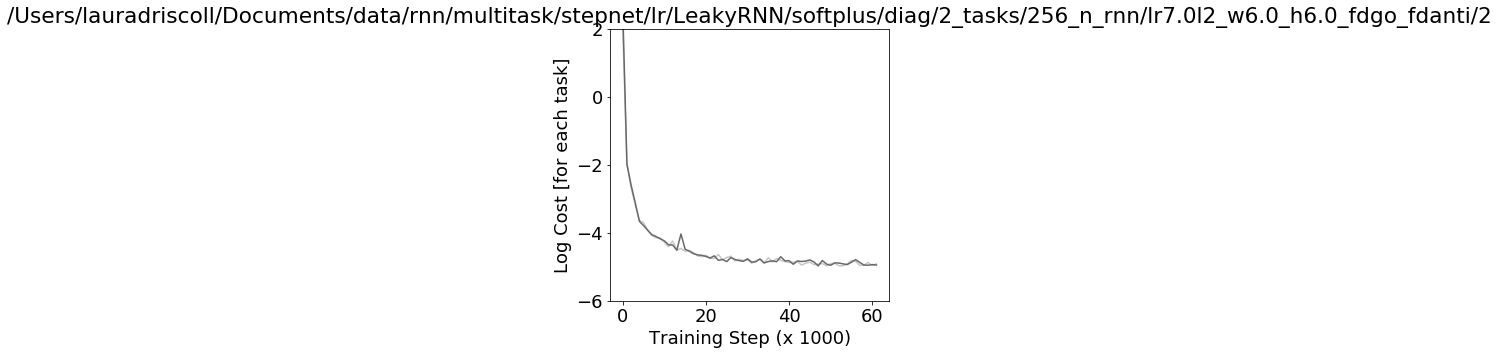

In [16]:
fig = plt.figure(figsize=(5, 5))
cmap=plt.get_cmap('Greys')
fname = os.path.join(m, 'log.json')

with open(fname, 'r') as f:
    log_all = json.load(f)
for ri in range(len(rule_trains)):
    r = rule_trains[ri]
    c = cmap((ri+1)/(len(rule_trains)+1))
    ax = fig.add_subplot(1,1,1)
    x = np.log(log_all['cost_'+r])
    plt.plot(x,'-',c = c)
    ax.set_xlabel('Training Step (x 1000)')
    ax.set_ylabel('Log Cost [for each task]')
    plt.ylim([-6,2])
    
plt.title(m)
plt.show()    

In [17]:
#output dynamics
rule = rule_trains[0]
h,trial,tasks = make_h_trial_rule(m)
w_in, b_in, w_out, b_out = get_model_params(m)

Overwrite sigma_rec with 0.000
0.0
INFO:tensorflow:Restoring parameters from /Users/lauradriscoll/Documents/data/rnn/multitask/stepnet/lr/LeakyRNN/softplus/diag/2_tasks/256_n_rnn/lr7.0l2_w6.0_h6.0_fdgo_fdanti/2/model.ckpt
Model restored from file: /Users/lauradriscoll/Documents/data/rnn/multitask/stepnet/lr/LeakyRNN/softplus/diag/2_tasks/256_n_rnn/lr7.0l2_w6.0_h6.0_fdgo_fdanti/2/model.ckpt
0.158113883008419
Variables being optimized:
<tf.Variable 'rnn/leaky_rnn_cell/kernel:0' shape=(281, 256) dtype=float32_ref>
<tf.Variable 'rnn/leaky_rnn_cell/bias:0' shape=(256,) dtype=float32_ref>
<tf.Variable 'output/weights:0' shape=(256, 3) dtype=float32_ref>
<tf.Variable 'output/biases:0' shape=(3,) dtype=float32_ref>
INFO:tensorflow:Restoring parameters from /Users/lauradriscoll/Documents/data/rnn/multitask/stepnet/lr/LeakyRNN/softplus/diag/2_tasks/256_n_rnn/lr7.0l2_w6.0_h6.0_fdgo_fdanti/2/model.ckpt
Model restored from file: /Users/lauradriscoll/Documents/data/rnn/multitask/stepnet/lr/LeakyRNN/

Overwrite sigma_rec with 0.000
0.0
INFO:tensorflow:Restoring parameters from /Users/lauradriscoll/Documents/data/rnn/multitask/stepnet/lr/LeakyRNN/softplus/diag/2_tasks/256_n_rnn/lr7.0l2_w6.0_h6.0_fdgo_fdanti/2/model.ckpt
Model restored from file: /Users/lauradriscoll/Documents/data/rnn/multitask/stepnet/lr/LeakyRNN/softplus/diag/2_tasks/256_n_rnn/lr7.0l2_w6.0_h6.0_fdgo_fdanti/2/model.ckpt
0.158113883008419
Variables being optimized:
<tf.Variable 'rnn/leaky_rnn_cell/kernel:0' shape=(281, 256) dtype=float32_ref>
<tf.Variable 'rnn/leaky_rnn_cell/bias:0' shape=(256,) dtype=float32_ref>
<tf.Variable 'output/weights:0' shape=(256, 3) dtype=float32_ref>
<tf.Variable 'output/biases:0' shape=(3,) dtype=float32_ref>
INFO:tensorflow:Restoring parameters from /Users/lauradriscoll/Documents/data/rnn/multitask/stepnet/lr/LeakyRNN/softplus/diag/2_tasks/256_n_rnn/lr7.0l2_w6.0_h6.0_fdgo_fdanti/2/model.ckpt
Model restored from file: /Users/lauradriscoll/Documents/data/rnn/multitask/stepnet/lr/LeakyRNN/

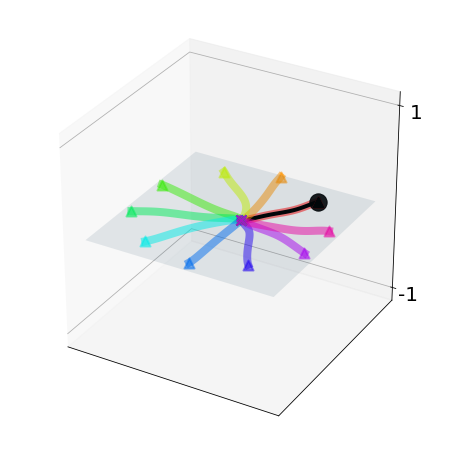

go1
-0.37300151884555816 0.32866192162036895 -0.3238815635442734 0.34576499164104463


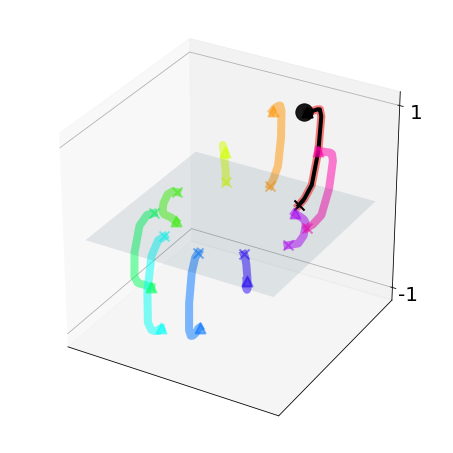

fix1
-0.002956682094372809 0.005629298952408135 -0.004370053764432669 0.011585000436753035


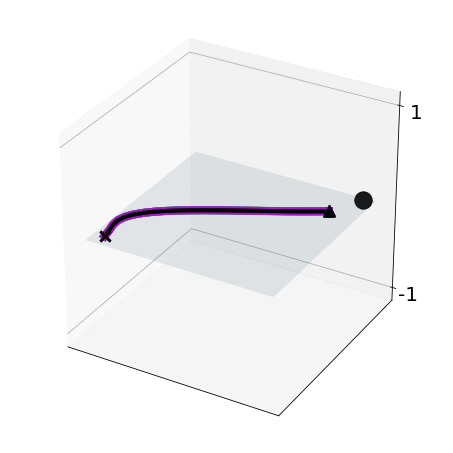

In [19]:
plt.rcParams.update({'font.size': 18})

lim = 1
lil_axes = False
plot_unstable = True
stim_theta = 0 #which fps to plot
rule = rule_trains[0]
fp_file = 'tf_fixed_pts_manytrials'

h,trial,tasks = make_h_trial_rule(m,mode = 'test')
# pca = PCA(n_components = 10)
# x = np.transpose(h[rule],(2,1,0))
# _ = pca.fit_transform(np.reshape(x,(x.shape[0],-1)).T)
# D_use = -pca.components_.T[:,1:]
D_use = make_D_use(m,rule,'stim1',0,'pca_h')
D_use[:,2] = w_out[:,2]

for epoch in trial[rule].epochs.keys():
    ax = plot_epoch_dynamics_3D(m,fp_file,epoch,h,trial,rule,D_use,y_set = [stim_theta,],lim = lim,
                                plot_eigenspect = False,lil_axes = lil_axes,fig_scale = 6,
                                plot_unstable = plot_unstable,ax_labels = ['PC1','PC2','Out 1'],q_thresh = -8)
    
    [x1,x2] = ax.get_xlim()
    [y1,y2] = ax.get_ylim()
    print(x1,x2,y1,y2)
    xx, yy = np.meshgrid(np.linspace(x1, x2, num=2), np.linspace(y1, y2, num=2))
    z = xx*0
    ax.plot_surface(xx, yy, z, alpha=0.1)
    
    ax.set_zlim([-1.1,1.1])
    ax.set_zticks([-1,1])
    ax.set_zticklabels([-1,1],fontsize = 20)
    
    ax.set_xticks([])
    ax.set_yticks([])
    plt.axis('on')
    ax.grid(True)
    
    
    if lil_axes ==True:
        figname = rule + '_' + epoch +'lil_axes.pdf'
    else:
        figname = rule + '_' + epoch +'.pdf'
        
    if not os.path.exists(figpath):
        os.makedirs(figpath)
    plt.savefig(os.path.join(figpath,figname))

    plt.subplots_adjust(bottom=0.3, right=.9, top=0.9,wspace = 0,hspace = 0)
    
    if lil_axes ==True:
        figname = rule + '_' + epoch +'lil_axes.png'
    else:
        figname = rule + '_' + epoch +'.png'
    plt.savefig(os.path.join(figpath,figname))

    plt.show()

fix1


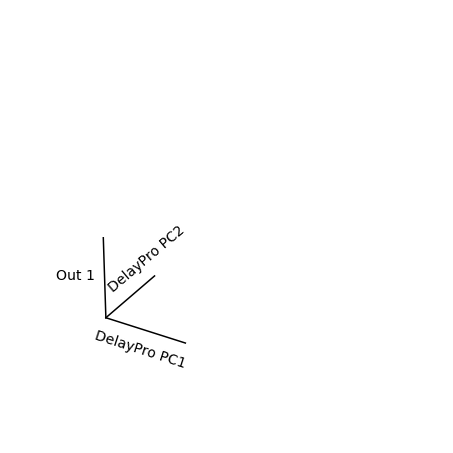

In [28]:
from tools_lnd import make_lil_axes, take_names
fig = plt.figure(figsize=(6,6),tight_layout=True,facecolor='white')
ax = fig.add_axes([0,0,1,1], projection='3d');

ax.set_xlim([-1.2,1.2])
ax.set_ylim([-1.2,1.2])
ax.set_zlim([-1.2,1.2])

epoch_name, rule_name, epoch_axes_name, h_epoch = take_names(epoch,rule,epoch_axes = [],
                                                                 h_epoch = [])
ax_labels = [rule_name+' PC1',rule_name+' PC2','Out 1']

make_lil_axes(ax,ax_labels,fontsize = 14,fac_len = 2)
ax.grid(False)
ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])
plt.axis('off')

figname = 'lil_axes.pdf'

if not os.path.exists(figpath):
    os.makedirs(figpath)
plt.savefig(os.path.join(figpath,figname))

figname = 'lil_axes.png'
plt.savefig(os.path.join(figpath,figname))

plt.show()

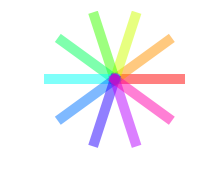

In [8]:
fig = plt.figure(figsize=(2,2),tight_layout=True,facecolor='white')
ax2 = fig.add_axes([0, 0, 1, 1])
stim1_locs = np.min(trial[rule].stim_locs[0:-1:8,[0,2]],axis=1) #only workds for single modality tasks
plot_stim_angles(ax2,stim1_locs,linewidth = 10, alpha = .9, markersize = 10,
                cat_task = False, show_stim = True, two_task = False)

figname = 'stim_angle_legend.pdf'
if not os.path.exists(figpath):
    os.makedirs(figpath)
plt.savefig(os.path.join(figpath,figname))

figname = 'stim_angle_legend.png'
plt.savefig(os.path.join(figpath,figname))
plt.show()